In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
import pandas as pd
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
df=pd.read_csv("spam.csv",encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Latin-1, also known as ISO 8859-1, is a character encoding standard that is used to represent characters for Western European languages that use the Latin alphabet. It is a single-byte encoding that can represent 256 characters and includes the ASCII character set as its first 128 characters.

The Latin-1 encoding assigns a unique code point to each character in its repertoire, which includes all the ASCII characters and additional characters such as accented letters used in French, German, Spanish, and other Western European languages.

In [27]:
# Define the translation table to remove punctuation characters
import string
translator = str.maketrans('', '', string.punctuation)

# Remove punctuation from "v2" column of the DataFrame
df["v2"] = df["v2"].apply(lambda x: x.translate(translator))

In [28]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Go until jurong point crazy Available only in ...,NaN,NaN,NaN
1,ham,Ok lar Joking wif u oni,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor U c already then say,NaN,NaN,NaN
4,ham,Nah I dont think he goes to usf he lives aroun...,NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì b going to esplanade fr home,NaN,NaN,NaN
5569,ham,Pity was in mood for that Soany other suggest...,NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like id ...,NaN,NaN,NaN


In [29]:
#Remove unnecessary columns--->col2,col3,col4
df.drop("Unnamed: 2", axis=1, inplace=True)
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)

In [30]:
df

,v1,v2
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like id ...


In [ ]:
#Tokenization It is the process of breaking down a text document into individual words or tokens

Tokenization is the process of breaking down a piece of text into individual words or terms, known as tokens. The text can be a sentence, a paragraph, or even an entire document. The tokens are useful in natural language processing and text analytics as they provide the basic building blocks for subsequent analysis.

Tokenization involves identifying the boundaries of words in a sentence or document. For example, consider the sentence: "The quick brown fox jumped over the lazy dog." Tokenization of this sentence would result in a list of tokens such as "The", "quick", "brown", "fox", "jumped", "over", "the", "lazy", and "dog".

Tokenization is usually the first step in many natural language processing tasks such as sentiment analysis, text classification, named entity recognition, and machine translation. There are various methods of tokenization available in natural language processing, including regular expressions, whitespace tokenization, and word-based tokenization using pre-trained models.



In [32]:
# Tokenize text
df["tokens"] = df["v2"].apply(nltk.word_tokenize)
df.head()

,v1,v2,tokens
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


Remove Stop words

Stop words are a set of commonly used words in a language that are usually removed from text data because they do not contribute much to the meaning of the text. Examples of stop words in English include "a", "an", "the", "in", "on", "at", "is", "am", "are", "was", "were", "be", "being", "been", "and", "or", "but", "not", "for", "of", "to", "with", "that", "this", "these", "those", "has", "have", "had", "he", "she", "it", "they", "them", "his", "her", "its", "their", "we", "us", "our", "you", "your"

In [33]:
# Remove stop words
stop_words = set(stopwords.words("english"))
df["no_stopwords"] = df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])
df.head()



,v1,v2,tokens,no_stopwords
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


In [34]:
df

,v1,v2,tokens,no_stopwords
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[This, 2nd, time, tried, 2, contact, u, U, å£7..."
5568,ham,Will Ì b going to esplanade fr home,"[Will, Ì, b, going, to, esplanade, fr, home]","[Will, Ì, b, going, esplanade, fr, home]"
5569,ham,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[Pity, mood, Soany, suggestions]"
5570,ham,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, id, inter..."


In [35]:
df

,v1,v2,tokens,no_stopwords
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[This, 2nd, time, tried, 2, contact, u, U, å£7..."
5568,ham,Will Ì b going to esplanade fr home,"[Will, Ì, b, going, to, esplanade, fr, home]","[Will, Ì, b, going, esplanade, fr, home]"
5569,ham,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[Pity, mood, Soany, suggestions]"
5570,ham,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, id, inter..."


Stemming: Stemming is the process of reducing a word to its base or root form. For example, the stem of "running" is "run". Stemming helps to reduce the number of unique words in a text and can improve the accuracy of text analysis by grouping together words with similar meanings.

In [37]:
# Stem words
porter_stemmer = PorterStemmer()
df["stemmed"] = df["no_stopwords"].apply(lambda x: [porter_stemmer.stem(word) for word in x])
df.head()

,v1,v2,tokens,no_stopwords,stemmed
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."


Lemmatization is the process of reducing words to their base or dictionary form (called "lemmas"), while stemming is the process of reducing words to their root form by removing suffixes and prefixes.

The key difference between stemming and lemmatization is that stemming can result in words that are not actual words, while lemmatization always results in actual words. For example, stemming might turn "jumps" into "jump", which is still a valid word, but it might also turn "ponies" into "poni", which is not a valid word. In contrast, lemmatization would turn both "jumps" and "ponies" into "jump" and "pony", respectively.

Sure, here's another example:

Consider the words "better" and "best". After stemming, both words will be reduced to "best". However, after lemmatization, "better" will be reduced to "good", and "best" will remain "best". This is because lemmatization takes into account the context and part of speech of the word, while stemming only looks at the word structure.

In [38]:
# Lemmatize words
wordnet_lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["no_stopwords"].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
df.head()

,v1,v2,tokens,no_stopwords,stemmed,lemmatized
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t..."


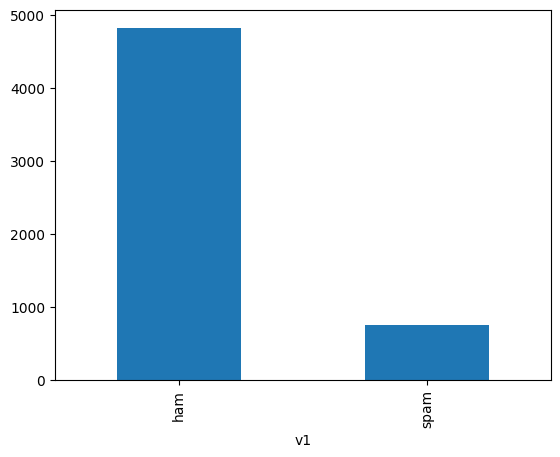

In [36]:
df.v1.value_counts().plot.bar();

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.
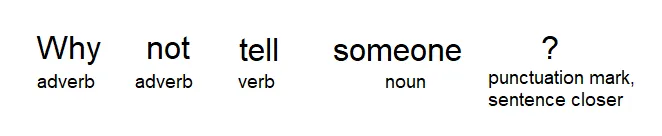


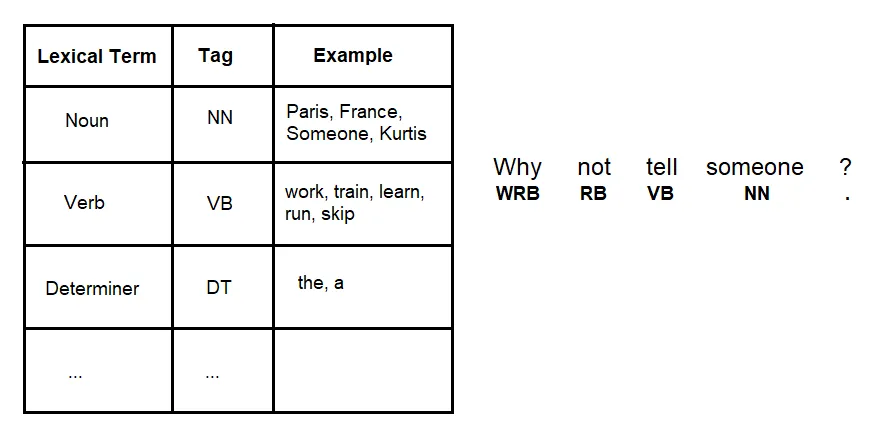

In [40]:
# pos tagging
from textblob import TextBlob
# df['pos']= TextBlob(str(df['lemmatized']))
# df_pos.tags
df["pos"] =df["lemmatized"].apply(lambda x: [TextBlob(" ".join(x)).tags])
df.head()


,v1,v2,tokens,no_stopwords,stemmed,lemmatized,pos
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n...","[[(Go, VB), (jurong, JJ), (point, NN), (crazy,..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[[(Ok, NNP), (lar, JJ), (Joking, NNP), (wif, N..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[[(Free, JJ), (entry, NN), (2, CD), (wkly, JJ)..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]","[[(U, JJ), (dun, NNS), (say, VBP), (early, JJ)..."
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...","[[(Nah, NNP), (I, PRP), (dont, VBP), (think, V..."


TF-IDF

Basic defn:
term frequency: No of times a term appeares in one single document document
Lets say you are having bunch of 100 papers;
No of times a term appeares in single page. domt consider all documents

Document frequency:
Lets say you are having bunch of 100 papers;
the number of papers in which the word is present is DF.

TF-IDF:
TF*IDF


TF-IDF stands for Term Frequency-Inverse Document Frequency
Let's consider a collection of four short sentences:

Document 1: The quick brown fox jumps over the lazy dog.---->Total 9 terms
Document 2: The brown dog barks at the fox.
Document 3: The lazy fox sleeps in the sun.
Document 4: The quick brown dog chases the lazy fox.
To calculate the TF-IDF score for each term in each document, we follow the steps below:

Term Frequency (TF) is the number of times a term appears in a document divided by the total number of terms in the document.
For example, in Document 1, the term "fox" appears only once, and the document has nine terms. So, the TF for "fox" in Document 1 is 1/9 = 0.11.

Inverse Document Frequency (IDF) is the logarithm of the total number of documents in the collection divided by the number of documents that contain the term.
For example, the term "fox" appears in three out of four documents in the collection. So, the IDF for "fox" is log(4/3) = 0.29.

The TF-IDF score is the product of the TF and IDF for each term in each document.
For example, the TF-IDF score for "fox" in Document 1 is 0.11 x 0.29 = 0.032.


In [42]:
# calculating TF-IDF
import numpy as np
# Calculate term frequency-inverse document frequency (TF-IDF)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df["v2"])
tfidf_matrix
np.shape(tfidf_matrix)

(5572, 9489)

In [43]:
print(tfidf_matrix)

  (0, 8970)	0.18533165691076994
  (0, 1175)	0.3250449070795673
  (0, 3854)	0.15270009724843112
  (0, 8294)	0.16130201278165904
  (0, 2220)	0.2745992510031893
  (0, 1882)	0.31029049851508855
  (0, 4862)	0.2745992510031893
  (0, 9217)	0.22415359492681128
  (0, 3894)	0.18091547501948232
  (0, 1884)	0.2745992510031893
  (0, 4412)	0.10738812897109133
  (0, 6051)	0.15692628542364076
  (0, 1414)	0.24717036276041154
  (0, 2504)	0.2517249054607048
  (0, 6455)	0.2542354766383449
  (0, 4704)	0.3250449070795673
  (0, 8713)	0.22901264860015585
  (0, 3797)	0.1477812426595277
  (1, 6045)	0.5462557824449175
  (1, 9110)	0.4313385731102942
  (1, 4672)	0.5233273701797004
  (1, 4901)	0.4080505634471753
  (1, 6011)	0.2741803362458879
  (2, 71)	0.2285734546867353
  (2, 1264)	0.1651212712540757
  :	:
  (5570, 3709)	0.26641542926787287
  (5570, 3114)	0.23615420421305283
  (5570, 7651)	0.19927105704143783
  (5570, 1912)	0.13359021497216086
  (5570, 8754)	0.20450406045006103
  (5570, 2798)	0.1812088983214566
  


assign documents
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'
 
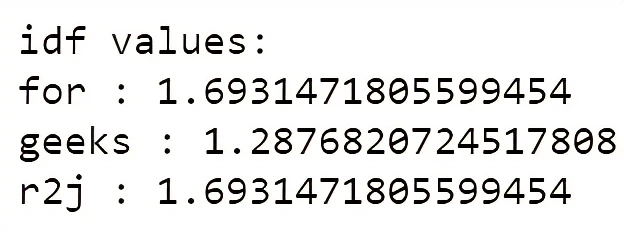

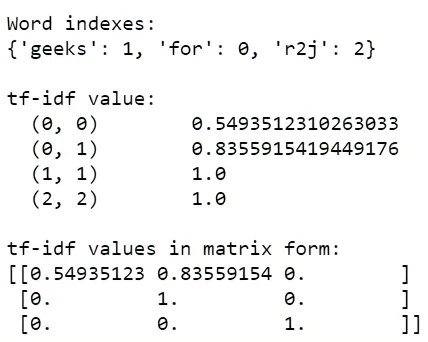


NOTE: Word index are given randomly to words



In [53]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('punkt')


# Filter the DataFrame to only include spam messages
spam_df = df[df["v1"] == "spam"]

df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,tokens,no_stopwords,stemmed,lemmatized,pos
0,ham,Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n...","[[(Go, VB), (jurong, JJ), (point, NN), (crazy,..."
1,ham,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[[(Ok, NNP), (lar, JJ), (Joking, NNP), (wif, N..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[[(Free, JJ), (entry, NN), (2, CD), (wkly, JJ)..."
3,ham,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]","[[(U, JJ), (dun, NNS), (say, VBP), (early, JJ)..."
4,ham,Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...","[[(Nah, NNP), (I, PRP), (dont, VBP), (think, V..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[This, 2nd, time, tried, 2, contact, u, U, å£7...","[thi, 2nd, time, tri, 2, contact, u, u, å£750,...","[This, 2nd, time, tried, 2, contact, u, U, å£7...","[[(This, DT), (2nd, CD), (time, NN), (tried, V..."
5568,ham,Will Ì b going to esplanade fr home,"[Will, Ì, b, going, to, esplanade, fr, home]","[Will, Ì, b, going, esplanade, fr, home]","[will, ì, b, go, esplanad, fr, home]","[Will, Ì, b, going, esplanade, fr, home]","[[(Will, MD), (Ì, VB), (b, NN), (going, VBG), ..."
5569,ham,Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, Soany, other,...","[Pity, mood, Soany, suggestions]","[piti, mood, soani, suggest]","[Pity, mood, Soany, suggestion]","[[(Pity, NNP), (mood, VBD), (Soany, NNP), (sug..."
5570,ham,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, id, inter...","[the, guy, bitch, i, act, like, id, interest, ...","[The, guy, bitching, I, acted, like, id, inter...","[[(The, DT), (guy, NN), (bitching, VBG), (I, P..."


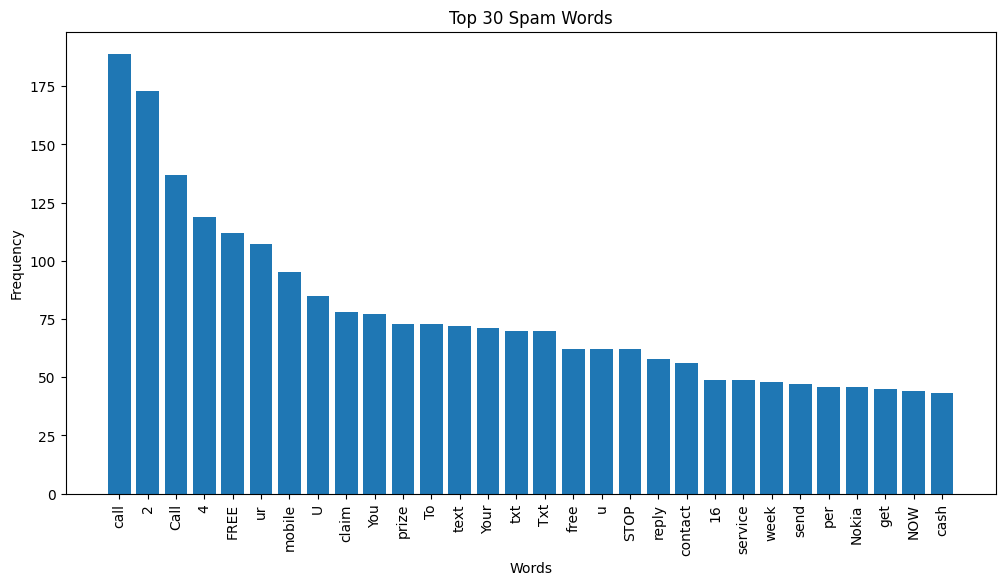

In [54]:

# Create a list of all words in the "no_stopwords2" column
words_list = [word for sublist in spam_df["no_stopwords"] for word in sublist]



# Calculate the frequency distribution of words
fdist = FreqDist(words_list)

# Get the 30 most common words in the distribution
top_words = fdist.most_common(30)

# Create a bar plot of the top 30 words
plt.figure(figsize=(12,6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Spam Words")
plt.show()